In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web
import datetime

In [116]:
start = "2021-1-1"
end = "2022-1-1"

In [117]:
tickers = ["AAPL","GE"]

In [118]:
df = pd.DataFrame()
for x in tickers:
    df[x] = web.DataReader(name = x, data_source="yahoo", start=start)["Adj Close"]

In [119]:
df.head()

,AAPL,GE
Date,,
2021-01-04,128.617096,83.496544
2021-01-05,130.207306,85.889000
2021-01-06,125.824318,90.594139
2021-01-07,130.117844,89.876411
2021-01-08,131.240921,90.434654


### Calculating Normalized returns for portfolio

In [120]:
for x in tickers:
    df[f"{x} normalized"] = df[x] / df[x].iloc[0]

In [121]:
df

,AAPL,GE,AAPL normalized,GE normalized
Date,,,,
2021-01-04,128.617096,83.496544,1.000000,1.000000
2021-01-05,130.207306,85.889000,1.012364,1.028653
2021-01-06,125.824318,90.594139,0.978286,1.085005
2021-01-07,130.117844,89.876411,1.011668,1.076409
2021-01-08,131.240921,90.434654,1.020400,1.083095
...,...,...,...,...
2022-01-04,179.699997,99.370003,1.397170,1.190109
2022-01-05,174.919998,99.370003,1.360006,1.190109
2022-01-06,172.000000,99.949997,1.337303,1.197055


## Allocation
- 50% in appl, 30 in ford, 20 % in GE

In [122]:
list(zip(tickers, [.8,.2]))

[('AAPL', 0.8), ('GE', 0.2)]

In [123]:
for stock, allo in zip(tickers, [.8,.2]):
    df[f"{stock} allocation"] = df[f"{stock} normalized"] * allo

In [124]:
df

,AAPL,GE,AAPL normalized,GE normalized,AAPL allocation,GE allocation
Date,,,,,,
2021-01-04,128.617096,83.496544,1.000000,1.000000,0.800000,0.200000
2021-01-05,130.207306,85.889000,1.012364,1.028653,0.809891,0.205731
2021-01-06,125.824318,90.594139,0.978286,1.085005,0.782629,0.217001
2021-01-07,130.117844,89.876411,1.011668,1.076409,0.809335,0.215282
2021-01-08,131.240921,90.434654,1.020400,1.083095,0.816320,0.216619
...,...,...,...,...,...,...
2022-01-04,179.699997,99.370003,1.397170,1.190109,1.117736,0.238022
2022-01-05,174.919998,99.370003,1.360006,1.190109,1.088005,0.238022
2022-01-06,172.000000,99.949997,1.337303,1.197055,1.069842,0.239411


### Caculating Positon 
- with an invetment of 20000

In [125]:
for x in tickers: 
    df[f"{x} positon"] = df[f"{x} allocation"] * 20000

In [126]:
df["total position"] = df[["AAPL positon", "GE positon"]].sum(axis = 1)

<AxesSubplot:xlabel='Date'>

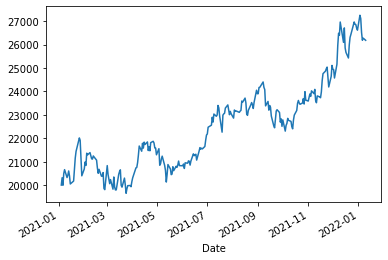

In [127]:
df["total position"].plot()

In [128]:
df.head()

,AAPL,GE,AAPL normalized,GE normalized,AAPL allocation,GE allocation,AAPL positon,GE positon,total position
Date,,,,,,,,,
2021-01-04,128.617096,83.496544,1.000000,1.000000,0.800000,0.200000,16000.000000,4000.000000,20000.000000
2021-01-05,130.207306,85.889000,1.012364,1.028653,0.809891,0.205731,16197.822530,4114.613417,20312.435948
2021-01-06,125.824318,90.594139,0.978286,1.085005,0.782629,0.217001,15652.577693,4340.018635,19992.596327
2021-01-07,130.117844,89.876411,1.011668,1.076409,0.809335,0.215282,16186.693400,4305.635048,20492.328448
2021-01-08,131.240921,90.434654,1.020400,1.083095,0.816320,0.216619,16326.404518,4332.378325,20658.782843


In [129]:
df["daily return"] = df["total position"].pct_change(1)

In [130]:
df

,AAPL,GE,AAPL normalized,GE normalized,AAPL allocation,GE allocation,AAPL positon,GE positon,total position,daily return
Date,,,,,,,,,,
2021-01-04,128.617096,83.496544,1.000000,1.000000,0.800000,0.200000,16000.000000,4000.000000,20000.000000,NaN
2021-01-05,130.207306,85.889000,1.012364,1.028653,0.809891,0.205731,16197.822530,4114.613417,20312.435948,0.015622
2021-01-06,125.824318,90.594139,0.978286,1.085005,0.782629,0.217001,15652.577693,4340.018635,19992.596327,-0.015746
2021-01-07,130.117844,89.876411,1.011668,1.076409,0.809335,0.215282,16186.693400,4305.635048,20492.328448,0.024996
2021-01-08,131.240921,90.434654,1.020400,1.083095,0.816320,0.216619,16326.404518,4332.378325,20658.782843,0.008123
...,...,...,...,...,...,...,...,...,...,...
2022-01-04,179.699997,99.370003,1.397170,1.190109,1.117736,0.238022,22354.726096,4760.436690,27115.162786,-0.005042
2022-01-05,174.919998,99.370003,1.360006,1.190109,1.088005,0.238022,21760.093012,4760.436690,26520.529702,-0.021930
2022-01-06,172.000000,99.949997,1.337303,1.197055,1.069842,0.239411,21396.844484,4788.221993,26185.066478,-0.012649


In [131]:
averagDailyReturn = df["daily return"].mean()

In [132]:
averagDailyReturn

0.0011414905707817485

In [133]:
std = df["daily return"].std()

In [134]:
std

0.013644518940651424

### Cumulative return

In [135]:
cumulativeReturn = 100 * (df["total position"][-1] /df["total position"][0] - 1)

In [136]:
cumulativeReturn

30.91656308214652

In [137]:
df["total position"][-1] 

26183.312616429303

### Sharp Ratio

In [138]:
sr = df["daily return"].mean() / df["daily return"].std()

In [139]:
sr

0.08365927562172087

### Annual Ahsrt Ratio

In [140]:
asr = (252 ** .5) * sr

In [141]:
asr

1.3280498289532918